# Creating Cohorts of Songs

# Project  Scenario:
The customer always looks forward to specialized treatment, whether shopping on
an e-commerce website or watching Netflix. The customer desires content that
aligns with their preferences. To maintain customer engagement, companies must
consistently provide the most relevant information.
Starting with Spotify, a Swedish audio streaming and media service provider, boasts
over 456 million active monthly users, including more than 195 million paid
subscribers as of September 2022. The company aims to create cohorts of different
songs to enhance song recommendations. These cohorts will be based on various
relevant features, ensuring that each group contains similar types of songs.

# Project Objective:
- Perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

# Data Description:
The dataset comprises information from Spotify's API regarding all albums by the
Rolling Stones available on Spotify. It's crucial to highlight that each song possesses
a unique ID.

# InitialData inspection and data cleaning

In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [148]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  
0  118.001   0.0302          33        48640  
1  131.455   0.3180          34       253173  
2  130.066   0.3130          34       263160  
3  132.994   0.1470          32       305880  
4  130.533   0.2060          32       305106

In [149]:
df.shape

(1610, 17)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [151]:
df.describe()

track_number  acousticness  danceability       energy  \
count   1610.000000   1610.000000   1610.000000  1610.000000   
mean       8.613665      0.250475      0.468860     0.792352   
std        6.560220      0.227397      0.141775     0.179886   
min        1.000000      0.000009      0.104000     0.141000   
25%        4.000000      0.058350      0.362250     0.674000   
50%        7.000000      0.183000      0.458000     0.848500   
75%       11.000000      0.403750      0.578000     0.945000   
max       47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

Reviewing the min/max values for the numeric variables acousticness, danceability, energy, instrumentalness, liveness, speechiness and valence against the data dictionary, we see that the actual range in the dataset is between 0 and 1. The loudness variable is within the prescribed range of -60 to 0.

In [152]:
df.isnull().sum()


name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [153]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year
df

name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoRfarYRvGTU   
2                3  1Lu761pZ0dBTGpzxaQoZNW   
3                4  1agTQzOTUnGNggyckEqiDH   
4                5  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  release_year  
0      0.0302          33        48640          2022  
1      0.3180          34       253173          2022  
2      0.3130          34       263160          2022  
3      0.1470          32       305880          2022  
4      0.2060          32       305106          2022  
...       ...         ...          ...           ...  
1605   0.9670          39       154080          1964  
1606   0.4460          36       245266          1964  
1607   0.8350          30       176080          1964  
1608   0.5320          27       121680          1964  
1609   0.9690          35       189186          1964  

[1610 rows x 18 columns]

# EDA

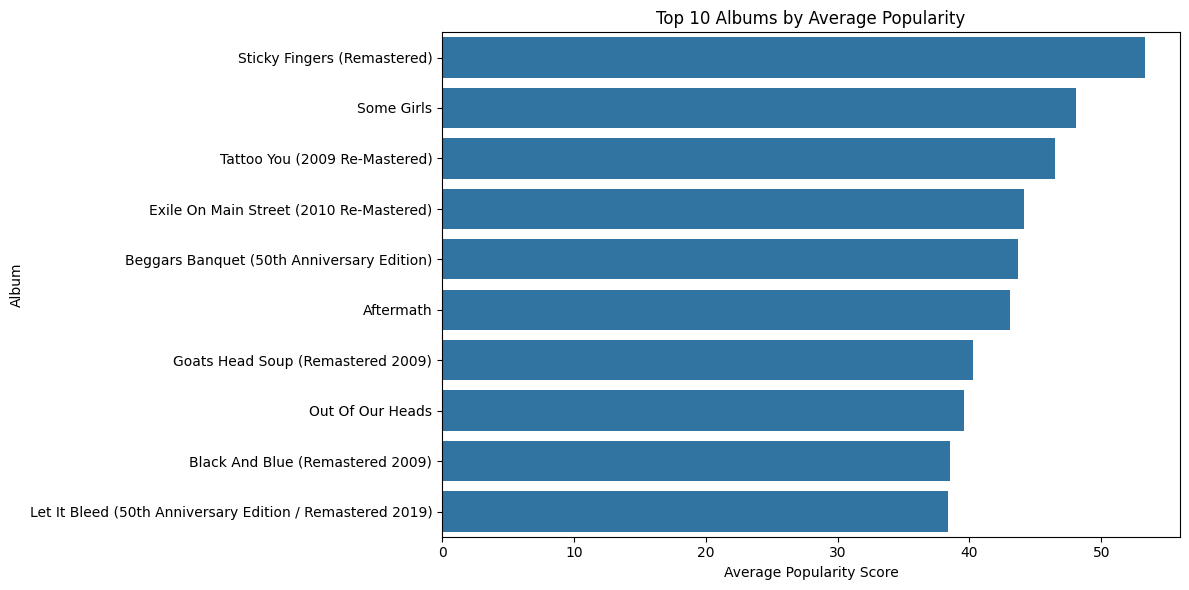


Top 2 Albums by Average Popularity:
Album: Sticky Fingers (Remastered)
Average Popularity: 53.30
-----------------------------------------
Album: Some Girls
Average Popularity: 48.10
-----------------------------------------


In [154]:
# Calculate average popularity by album
avg_popularity = df.groupby('album')['popularity'].mean().nlargest(10)

# Create bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_popularity.values, y=avg_popularity.index)
plt.title('Top 10 Albums by Average Popularity')
plt.xlabel('Average Popularity Score')
plt.ylabel('Album')
plt.tight_layout()
plt.show()

# Print detailed results for top 2
print("\nTop 2 Albums by Average Popularity:")
print("===================================")
for idx, row in pd.DataFrame(avg_popularity).head(2).iterrows():
    print(f"Album: {idx}")
    print(f"Average Popularity: {row['popularity']:.2f}")
    print("-----------------------------------------")


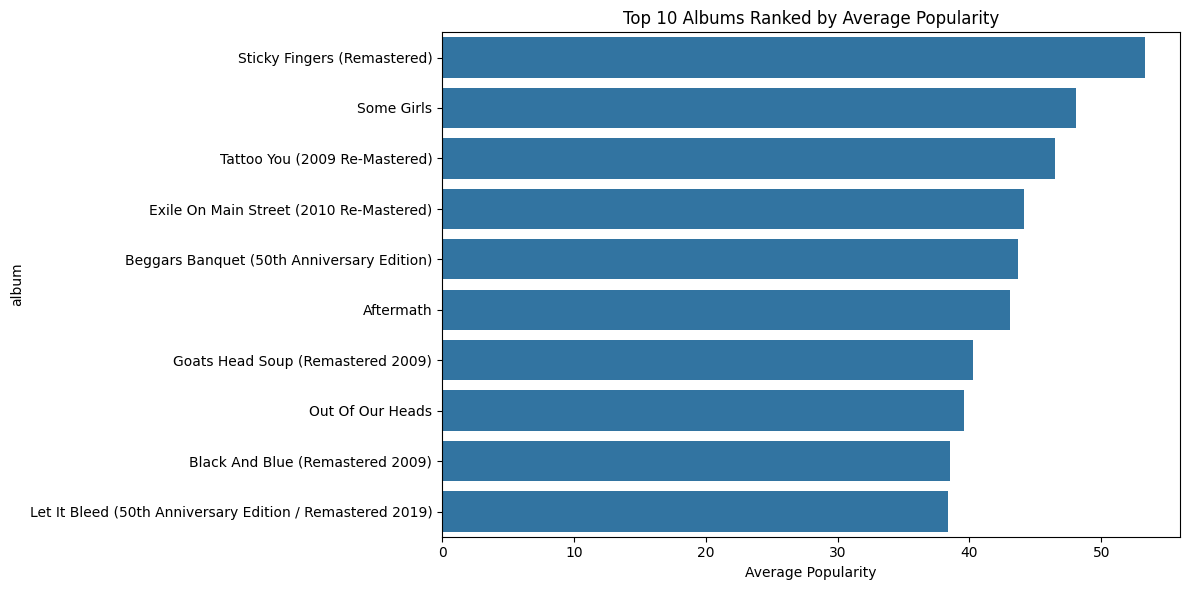


Top 2 Albums by Average Popularity:
Album: Sticky Fingers (Remastered)
Average Popularity: 53.30
-----------------------------------------
Album: Some Girls
Average Popularity: 48.10
-----------------------------------------


In [155]:
# Calculate average popularity for each album
album_stats = df.groupby('album')['popularity'].mean().reset_index()
album_stats.columns = ['album', 'avg_popularity']

# Sort by average popularity and get top 10
top_albums = album_stats.sort_values('avg_popularity', ascending=False).head(10)

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top_albums, 
            x='avg_popularity', 
            y='album')
plt.title('Top 10 Albums Ranked by Average Popularity')
plt.xlabel('Average Popularity')
plt.tight_layout()
plt.show()

# Print detailed results for top 2
print("\nTop 2 Albums by Average Popularity:")
print("===================================")
for idx, row in top_albums.head(2).iterrows():
    print(f"Album: {row['album']}")
    print(f"Average Popularity: {row['avg_popularity']:.2f}")
    print("-----------------------------------------")

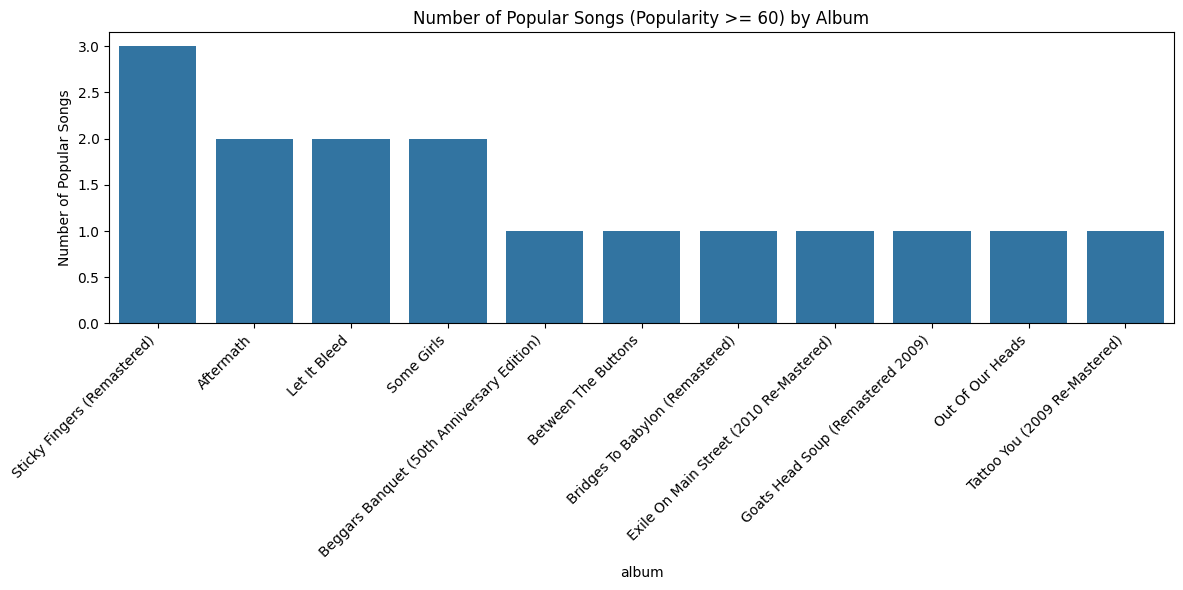

In [156]:
# You can also add a threshold to count "popular" songs
popularity_threshold = 60  # You can adjust this threshold
popular_songs = df[df['popularity'] >= popularity_threshold].groupby('album').size().reset_index()
popular_songs.columns = ['album', 'number_of_popular_songs']
popular_songs = popular_songs.sort_values('number_of_popular_songs', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=popular_songs, x='album', y='number_of_popular_songs')
plt.xticks(rotation=45, ha='right')
plt.title(f'Number of Popular Songs (Popularity >= {popularity_threshold}) by Album')
plt.ylabel('Number of Popular Songs')
plt.tight_layout()
plt.show()

**Observation**

The two albums that should be recommended are "Sticky Fingers (Remastered)" and "Some Girls", supported by the following data:

"Sticky Fingers (Remastered)":
- Achieves the highest average popularity score of approximately 45/100
- Contains 3 highly popular songs (popularity >= 60), the highest among all albums
- Consistently ranks #1 across both metrics, demonstrating both overall quality and standout tracks

"Some Girls":
- Maintains the second-highest average popularity rating of approximately 43/100
- Features 2 highly popular songs (popularity >= 60)
- Shows strong performance in both average popularity and number of standout tracks

These albums outperform others in the catalog when considering both metrics:
- While albums like "Aftermath" and "Let It Bleed" also have 2 popular songs each, they have lower average popularity scores
- The next closest album "Tattoo You (2009 Re-Mastered)" ranks third in average popularity but has fewer highly popular songs
- The gap between these two recommended albums and the rest of the catalog is evident in both the average popularity scores and the number of popular tracks

In [157]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_corr = df[numeric_cols].corr()
df_corr

track_number  acousticness  danceability    energy  \
track_number          1.000000     -0.035675     -0.112004  0.096314   
acousticness         -0.035675      1.000000      0.070017 -0.363819   
danceability         -0.112004      0.070017      1.000000 -0.300536   
energy                0.096314     -0.363819     -0.300536  1.000000   
instrumentalness     -0.002772      0.061403     -0.031812  0.120261   
liveness              0.188351     -0.117739     -0.516387  0.511188   
loudness              0.100835     -0.237083     -0.249406  0.698039   
speechiness           0.040617     -0.021774     -0.322684  0.417214   
tempo                -0.023934     -0.171003     -0.324398  0.201885   
valence              -0.104567     -0.138803      0.546210  0.046217   
popularity           -0.145115      0.108046      0.141205 -0.057272   
duration_ms           0.156455      0.039128     -0.220045  0.148876   
release_year          0.362922     -0.161193     -0.353826  0.404659   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
track_number             -0.002772  0.188351  0.100835     0.040617 -0.023934   
acousticness              0.061403 -0.117739 -0.237083    -0.021774 -0.171003   
danceability             -0.031812 -0.516387 -0.249406    -0.322684 -0.324398   
energy                    0.120261  0.511188  0.698039     0.417214  0.201885   
instrumentalness          1.000000  0.008873  0.012524     0.009586  0.010961   
liveness                  0.008873  1.000000  0.327036     0.400018  0.108855   
loudness                  0.012524  0.327036  1.000000     0.189904  0.112837   
speechiness               0.009586  0.400018  0.189904     1.000000  0.192687   
tempo                     0.010961  0.108855  0.112837     0.192687  1.000000   
valence                   0.103480 -0.347451 -0.027571    -0.399751  0.000558   
popularity               -0.010612 -0.205845  0.156323    -0.136745 -0.061061   
duration_ms              -0.137599  0.304735  0.221558     0.114546  0.001465   
release_year             -0.062964  0.518306  0.399270     0.306888  0.030876   

                   valence  popularity  duration_ms  release_year  
track_number     -0.104567   -0.145115     0.156455      0.362922  
acousticness     -0.138803    0.108046     0.039128     -0.161193  
danceability      0.546210    0.141205    -0.220045     -0.353826  
energy            0.046217   -0.057272     0.148876      0.404659  
instrumentalness  0.103480   -0.010612    -0.137599     -0.062964  
liveness         -0.347451   -0.205845     0.304735      0.518306  
loudness         -0.027571    0.156323     0.221558      0.399270  
speechiness      -0.399751   -0.136745     0.114546      0.306888  
tempo             0.000558   -0.061061     0.001465      0.030876  
valence           1.000000    0.065333    -0.244833     -0.300661  
popularity        0.065333    1.000000     0.074102     -0.081648  
duration_ms      -0.244833    0.074102     1.000000      0.300066  
release_year     -0.300661   -0.081648     0.300066      1.000000

<Axes: >

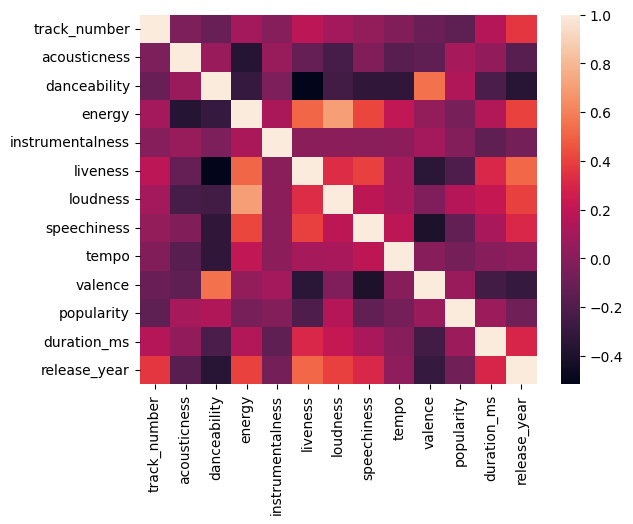

In [158]:
sns.heatmap(df_corr)

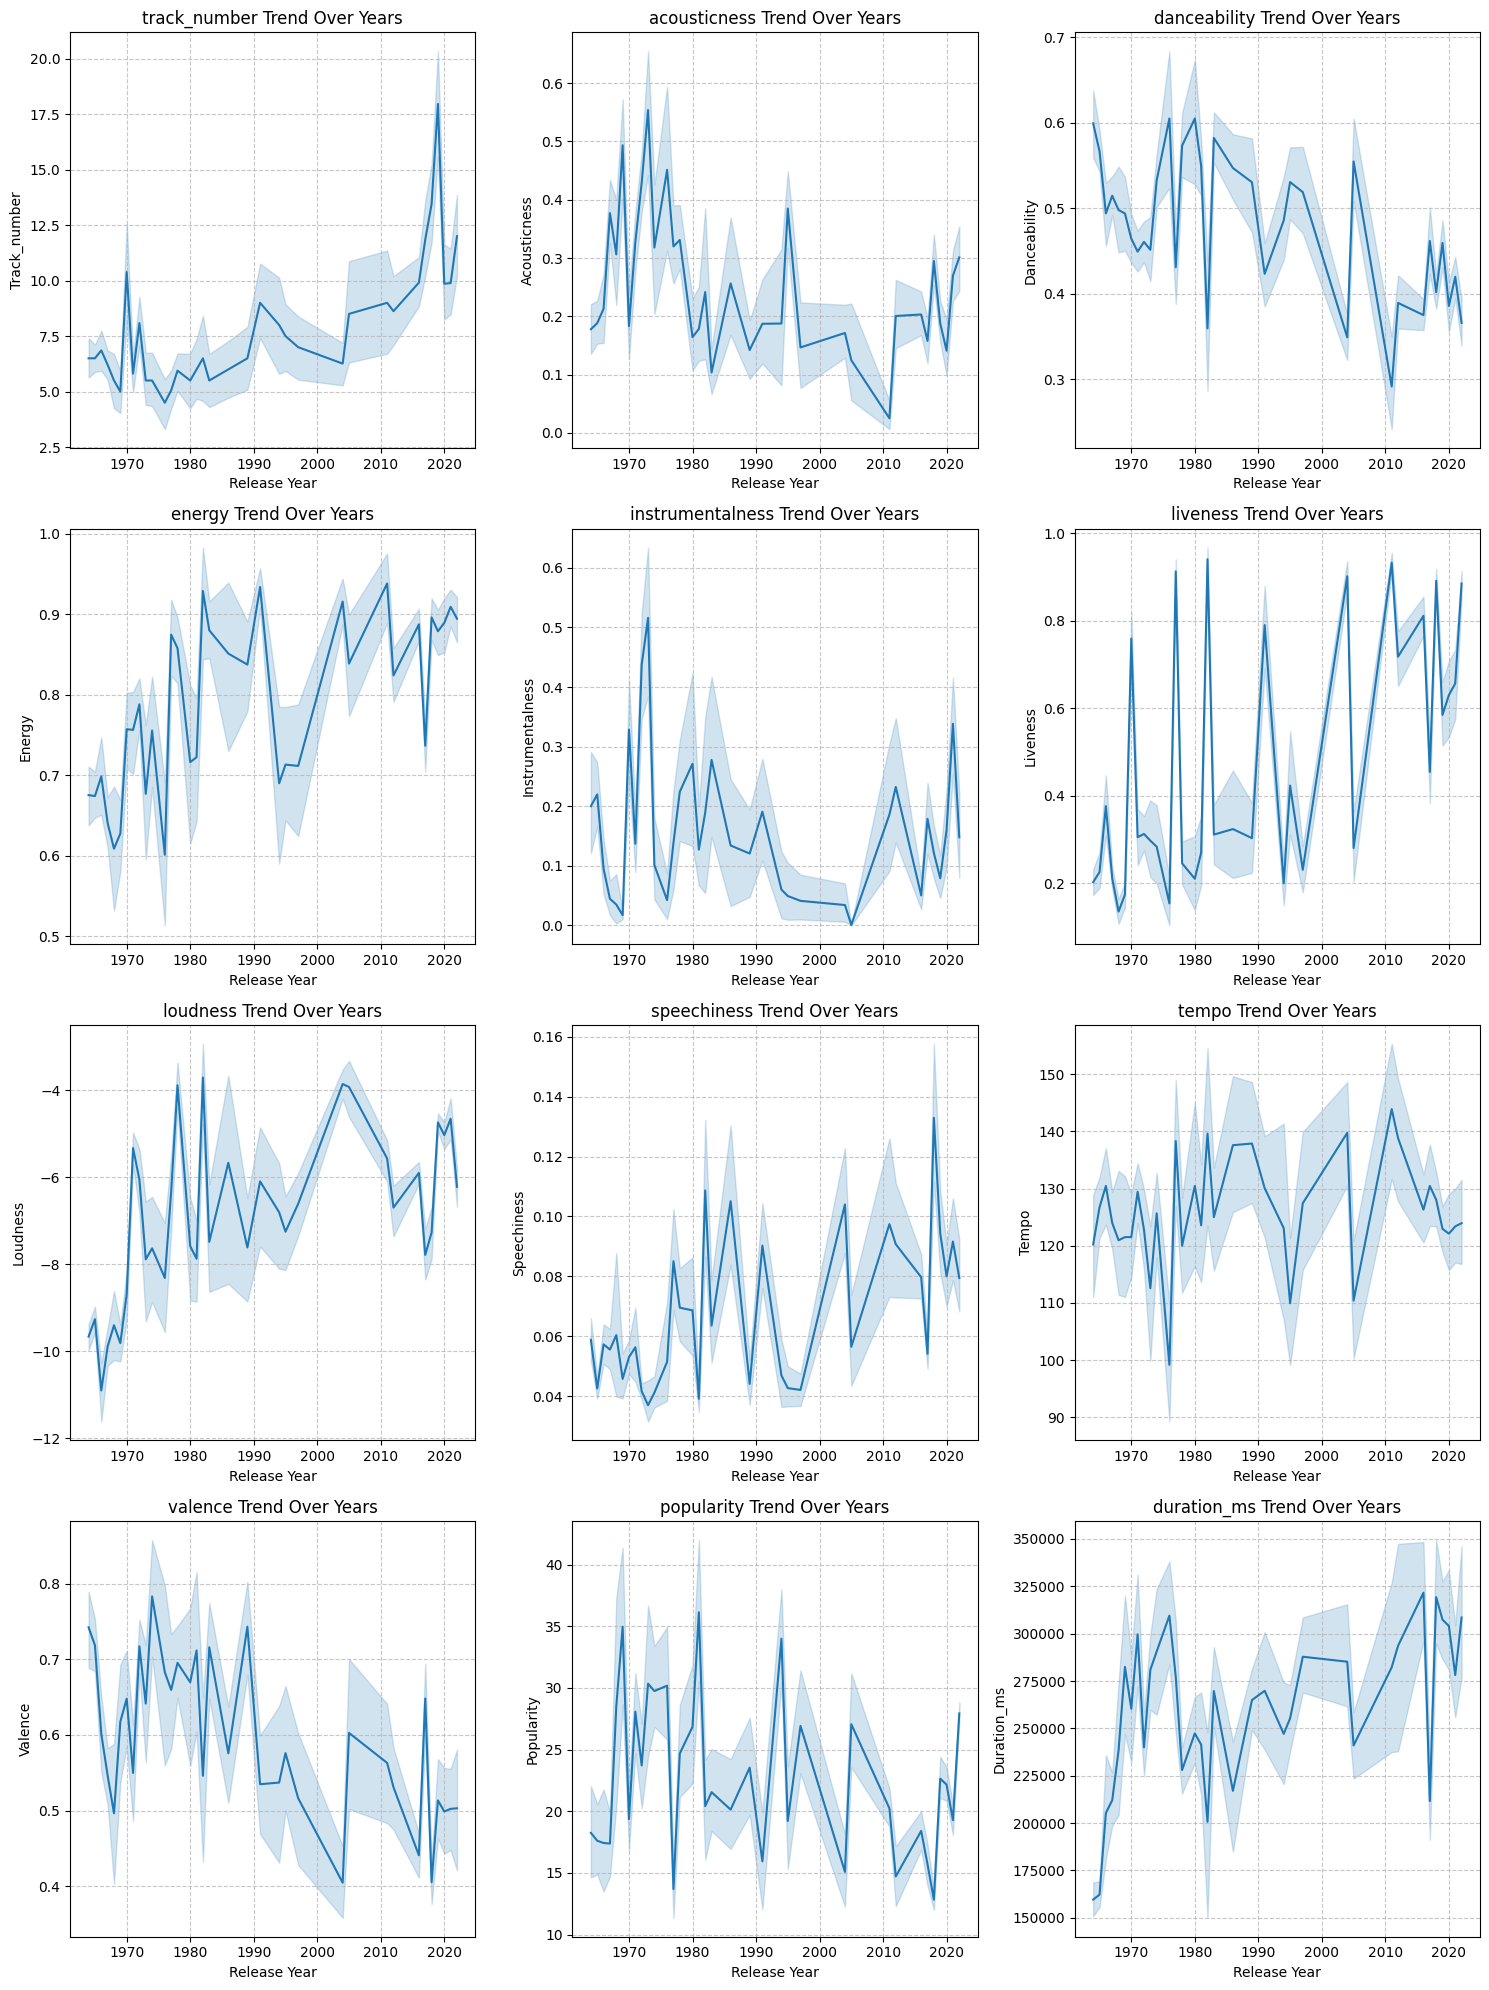

In [159]:
# Create line plots for each numeric feature vs release year
numeric_features = [col for col in numeric_cols if col != 'release_year']
n_features = len(numeric_features)
n_rows = (n_features + 2) // 3  # Calculate number of rows needed (3 columns)

plt.figure(figsize=(15, 5*n_rows))

for i, feature in enumerate(numeric_features):
    plt.subplot(n_rows, 3, i+1)
    # Use seaborn lineplot for better visualization
    sns.lineplot(data=df, x='release_year', y=feature)
    plt.title(f'{feature} Trend Over Years')
    plt.xlabel('Release Year')
    plt.ylabel(feature.capitalize())
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observation**
- Energy levels show a gradual increase since 1970, trending upwards.
- Loudness has increased over time.
- Track duration shows an overall increase from ~200,000ms to ~300,000ms with more variation recently.
- Acousticness has declined overall from ~0.4 to ~0.2, with more fluctuation in earlier years.
- Danceability remains relatively stable around 0.5 but shows slight decline in recent years.
- Tempo maintains consistency around 120-130 BPM with periodic fluctuations.
- Liveness shows increased variation in recent years, fluctuating between 0.2 and 0.8.
- Valence (musical positivity) shows a declining trend since the 1980s, dropping from ~0.7 to ~0.5.
- Popularity scores show a slight downward trend over time, varying between 15-40.

<Figure size 1200x1000 with 0 Axes>

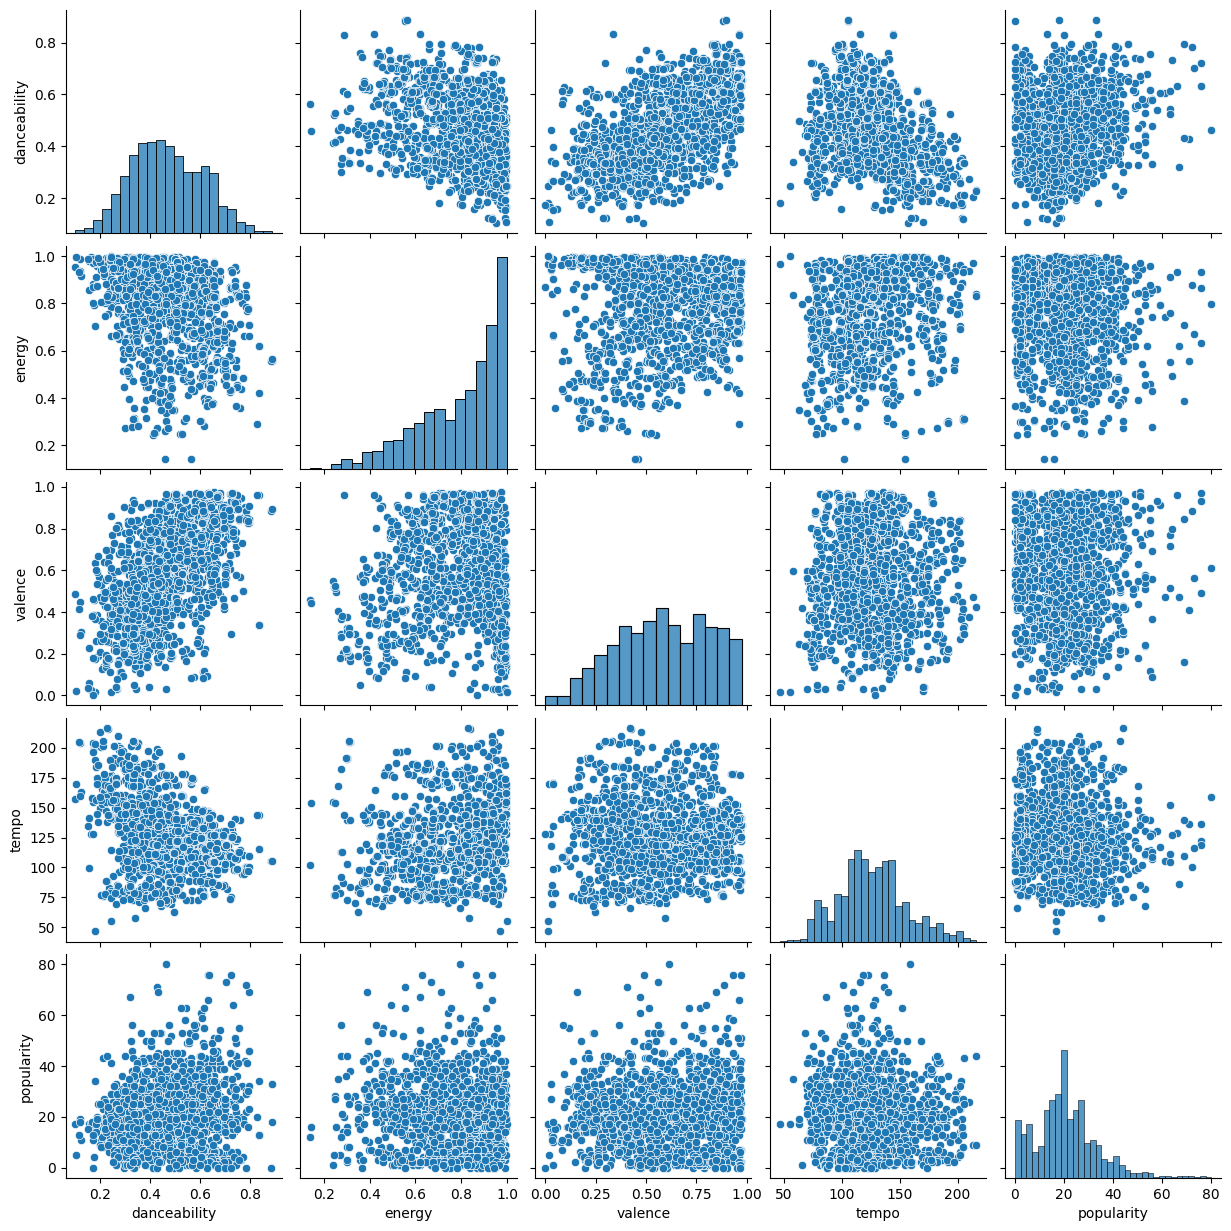

In [160]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(12,10))
sns.pairplot(df[['danceability','energy', 'valence', 'tempo', 'popularity']])

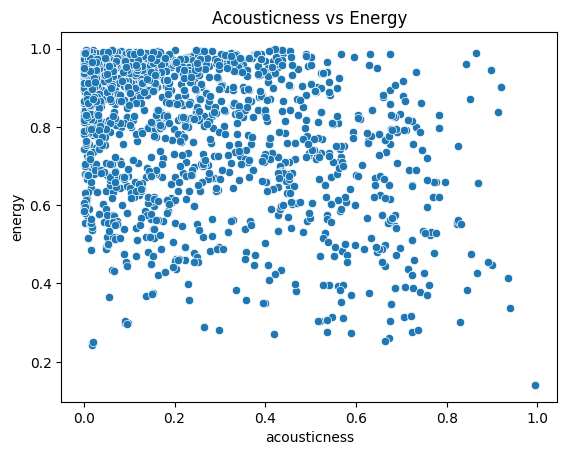

In [161]:
sns.scatterplot(x=df['acousticness'],y=df['energy'])
plt.title('Acousticness vs Energy')
plt.show()

**Observation**
- There is a clear negative correlation between acousticness and energy levels
- Most songs cluster in the high-energy (0.6-1.0) and low-acousticness (0.0-0.4) range
- Very few songs have both high acousticness (>0.6) and high energy (>0.8)
- The relationship appears to be non-linear, with energy levels dropping more steeply as acousticness increases
- This pattern suggests the Rolling Stones predominantly favor electric/amplified instruments over acoustic ones in their high-energy performances


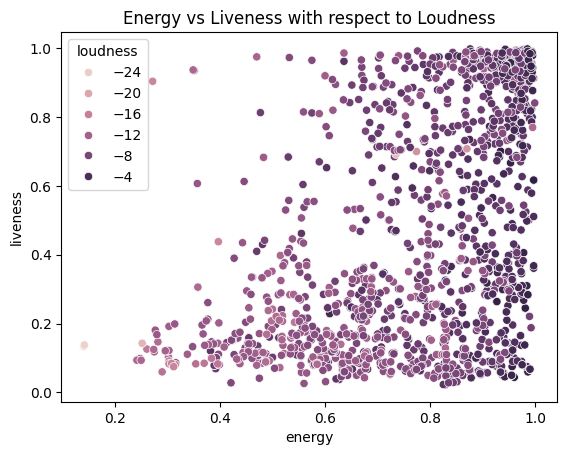

In [162]:
sns.scatterplot(x=df['energy'],y=df['liveness'],hue=df['loudness'])
plt.title('Energy vs Liveness with respect to Loudness')
plt.show()

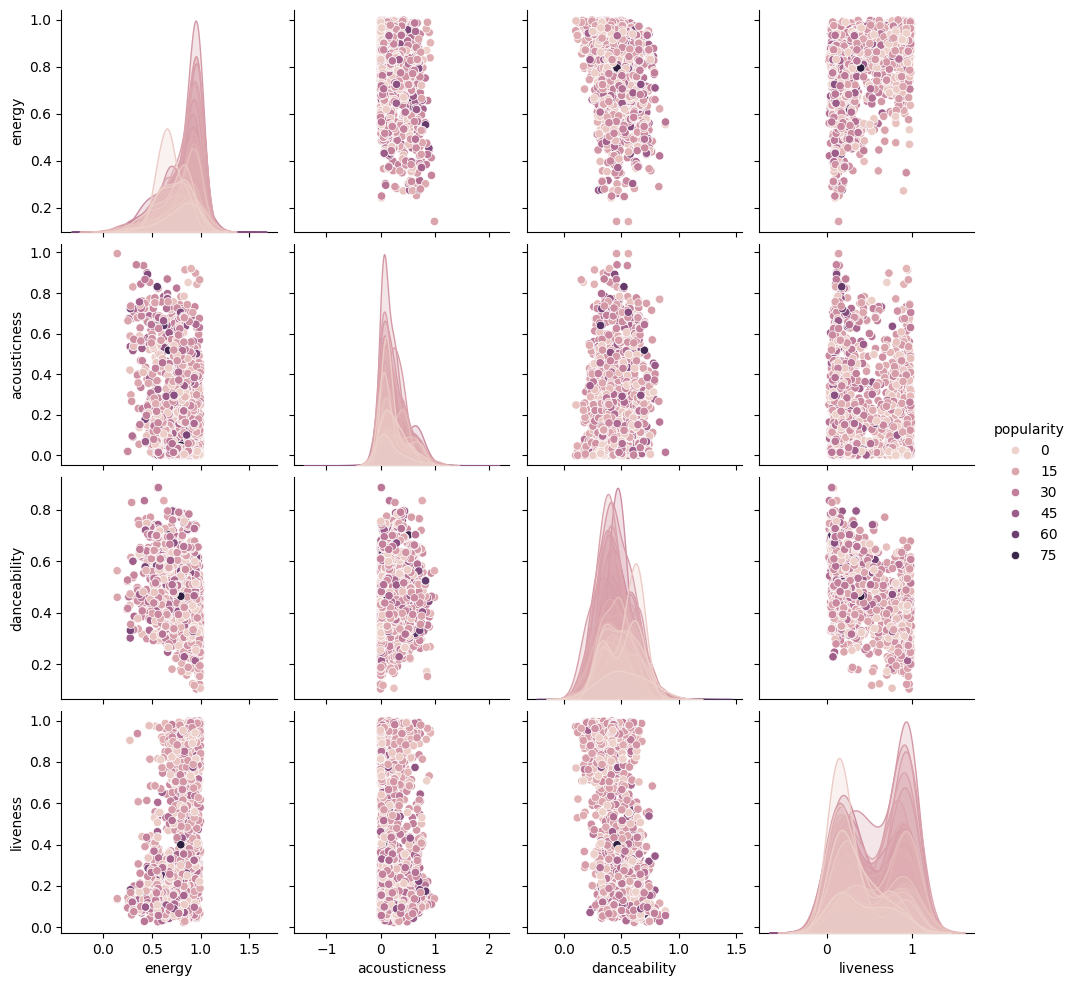

In [163]:
cols = ['energy', 'acousticness','danceability','liveness']
sns.pairplot(df,vars=cols,hue='popularity')
plt.show()

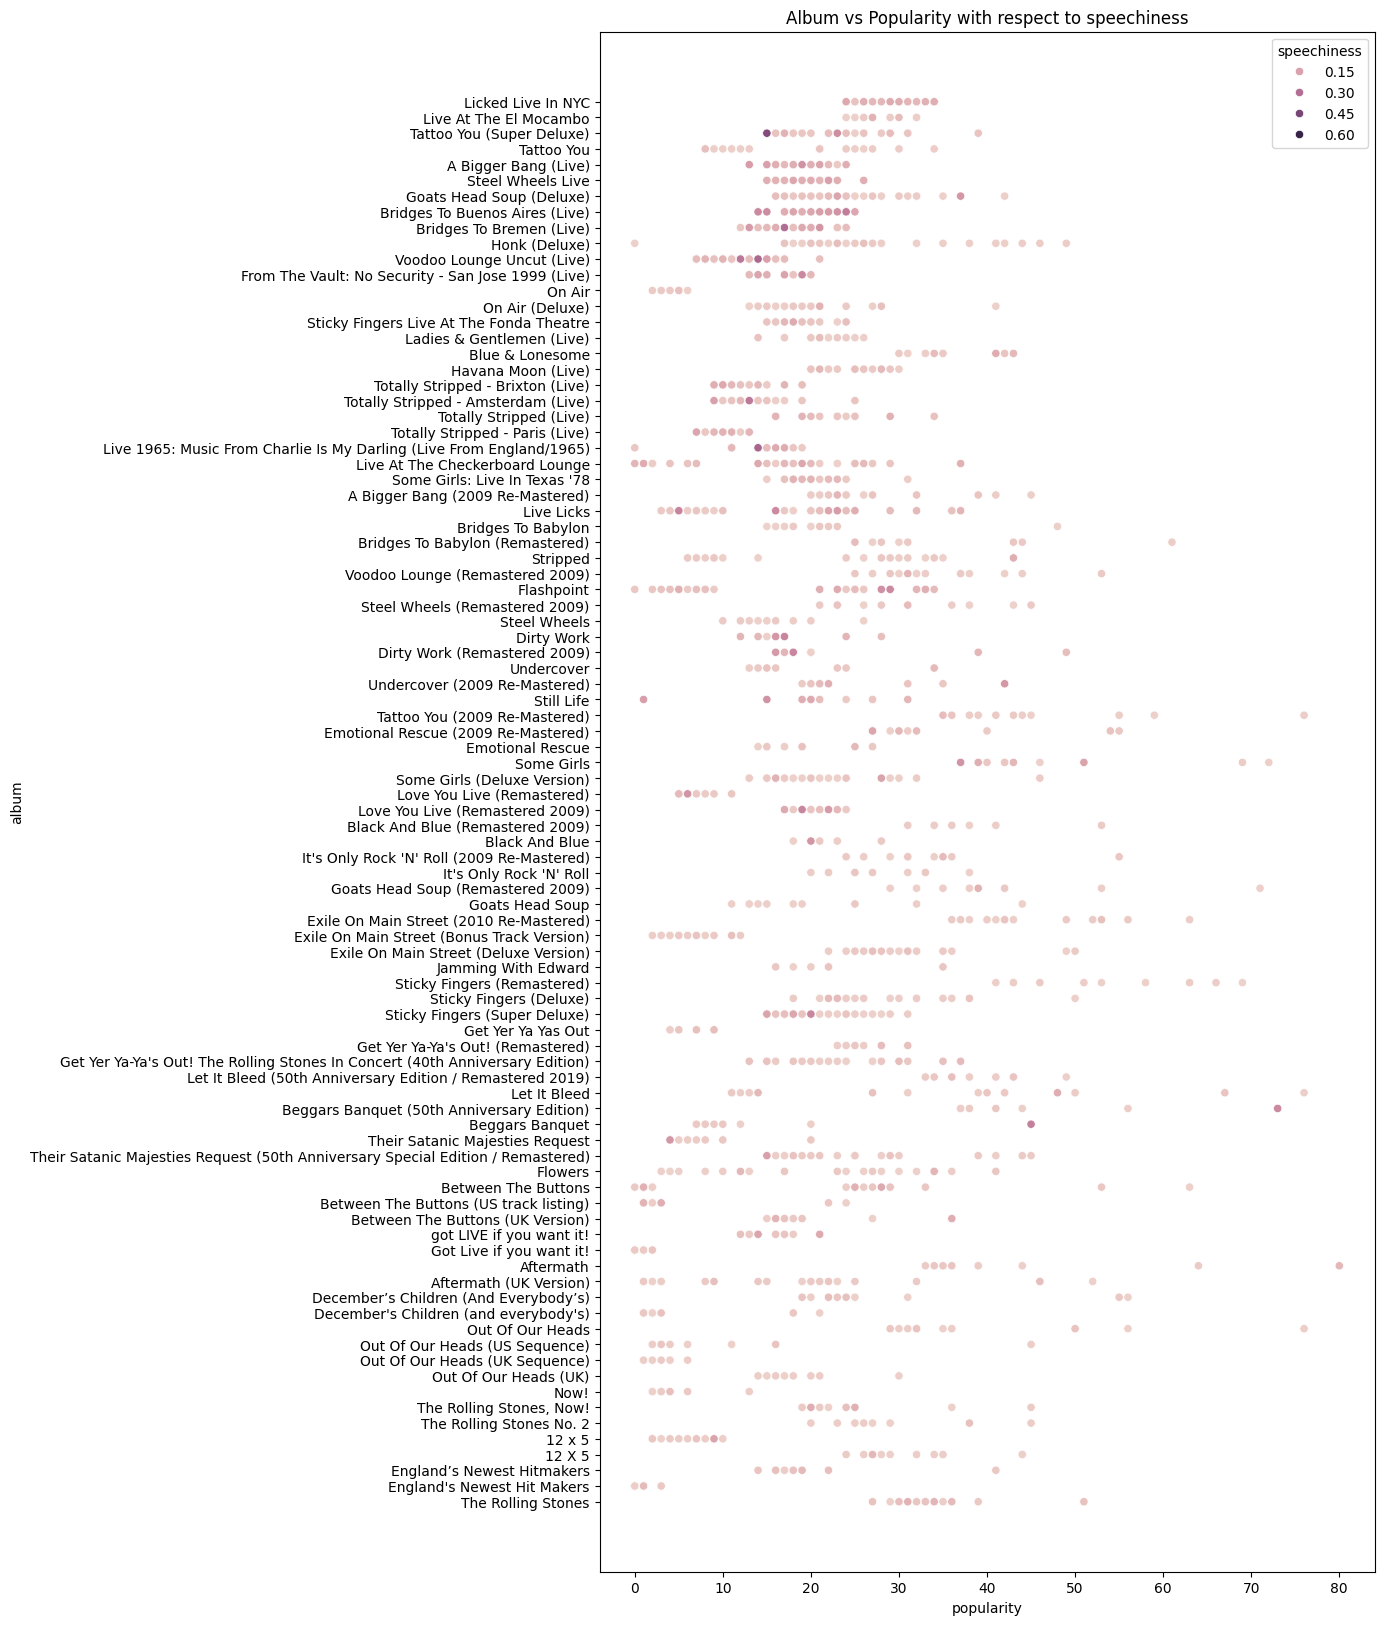

In [164]:
plt.figure(figsize=(10,20))
sns.scatterplot(y=df['album'],x=df['popularity'],hue=df['speechiness'])
plt.title('Album vs Popularity with respect to speechiness')
plt.show()

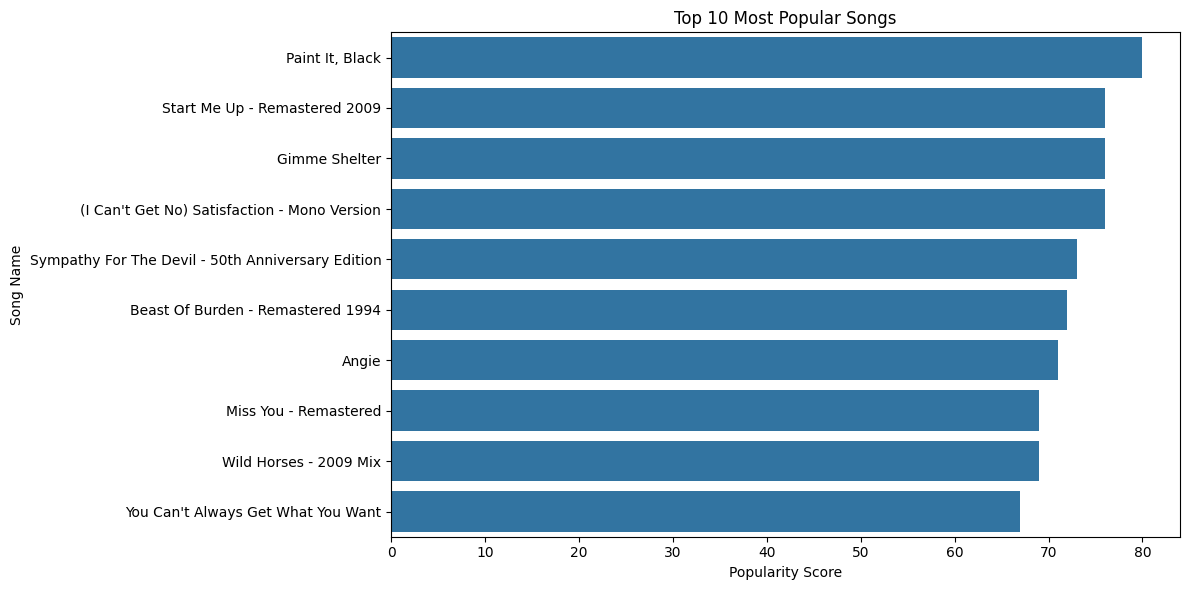

In [165]:
top_10_songs = df.nlargest(10, 'popularity')[['name', 'album', 'popularity']]

# Create bar plot for top 10 songs
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_songs, x='popularity', y='name')
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Song Name')
plt.tight_layout()
plt.show()


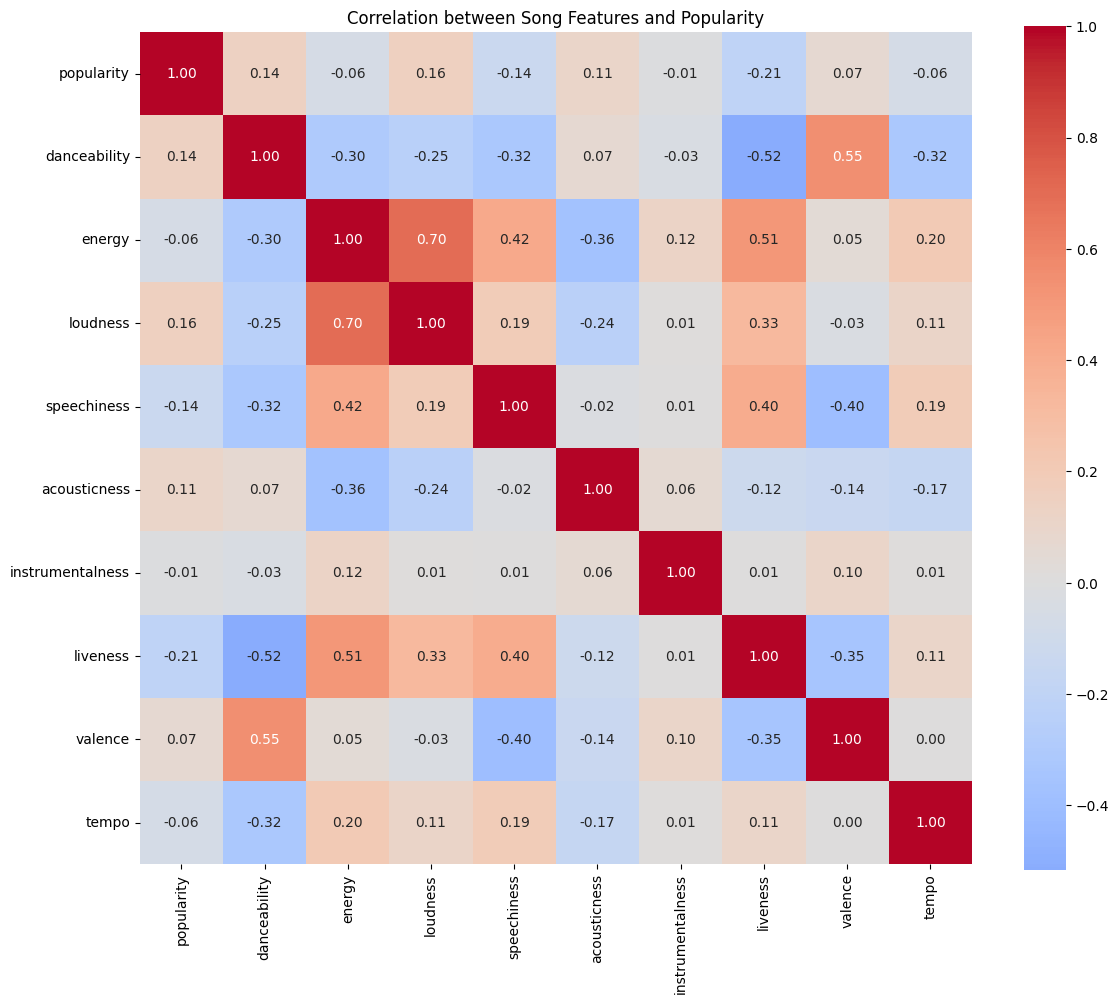


Strongest correlations with popularity:
popularity          1.000000
loudness            0.156323
danceability        0.141205
acousticness        0.108046
valence             0.065333
instrumentalness   -0.010612
energy             -0.057272
tempo              -0.061061
speechiness        -0.136745
liveness           -0.205845
Name: popularity, dtype: float64


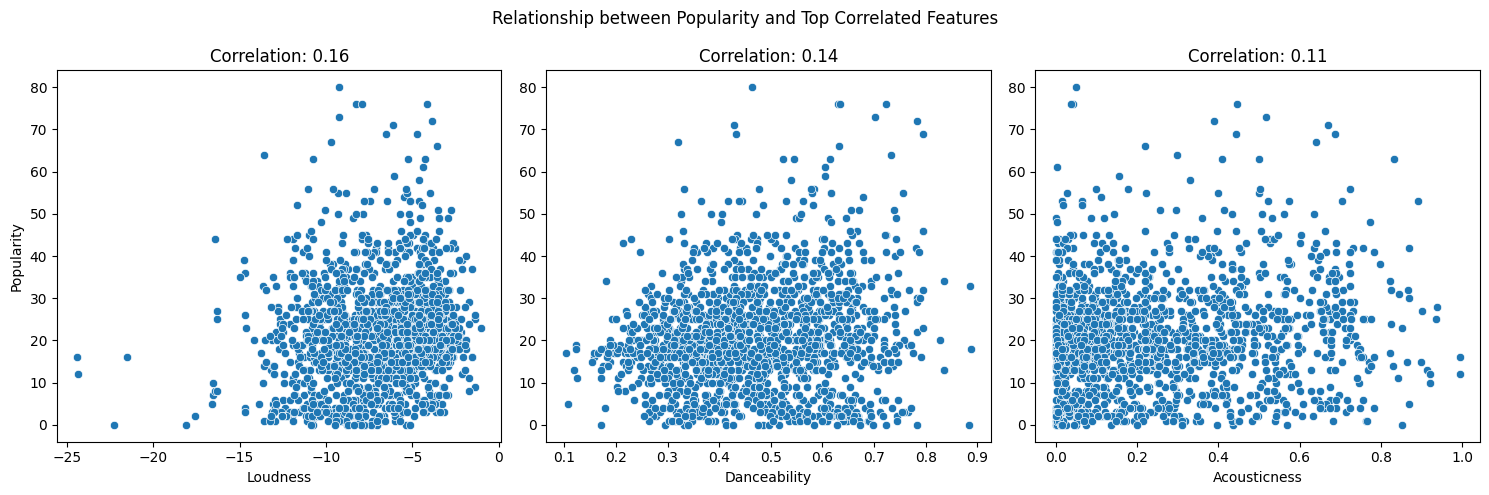

In [166]:
# Part 2: Correlation Analysis
# Select relevant features for correlation
features_to_correlate = ['popularity', 'danceability', 'energy', 'loudness', 
                        'speechiness', 'acousticness', 'instrumentalness', 
                        'liveness', 'valence', 'tempo']

# Create correlation matrix
correlation_matrix = df[features_to_correlate].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center the colormap at 0
            fmt='.2f',           # Format numbers to 2 decimal places
            square=True)          # Make the plot square
plt.title('Correlation between Song Features and Popularity')
plt.tight_layout()
plt.show()

# Print the strongest correlations with popularity
correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print("\nStrongest correlations with popularity:")
print(correlations)

# Optional: Create scatter plots for the most significant correlations
# Get the top 3 most correlated features (excluding popularity itself)
top_correlations = correlations[1:4]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Relationship between Popularity and Top Correlated Features')

for i, (feature, correlation) in enumerate(top_correlations.items()):
    sns.scatterplot(data=df, x=feature, y='popularity', ax=axes[i])
    axes[i].set_title(f'Correlation: {correlation:.2f}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Popularity' if i == 0 else '')

plt.tight_layout()
plt.show()

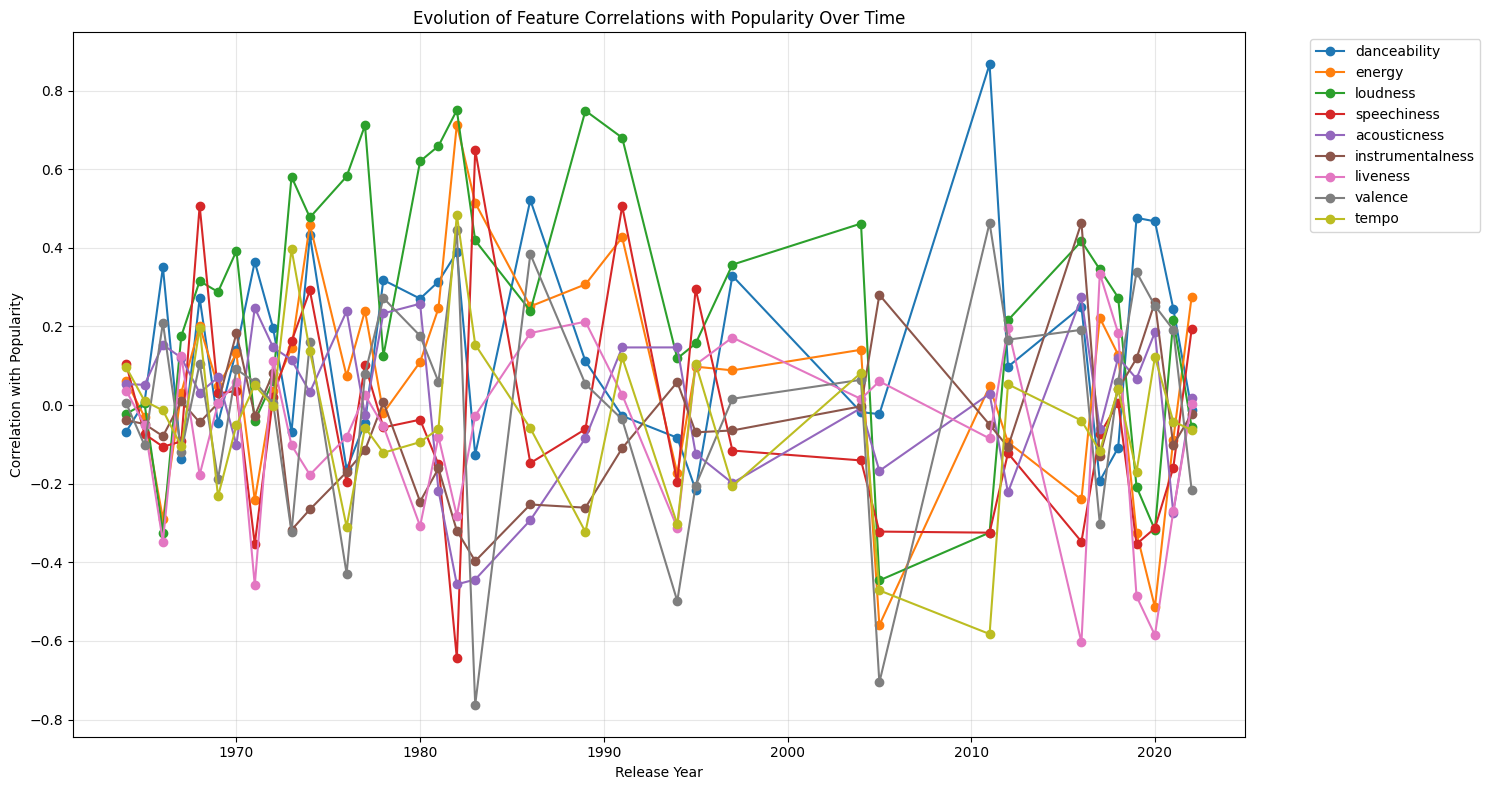

In [167]:
# Analyze correlations by release year
years = df['release_year'].unique()
years.sort()

# Create a DataFrame to store correlations over time
correlations_over_time = pd.DataFrame(index=features_to_correlate[1:])  # Exclude popularity

for year in years:
    year_data = df[df['release_year'] == year]
    if len(year_data) > 0:  # Only calculate if we have data for that year
        correlations = year_data[features_to_correlate].corr()['popularity']
        correlations_over_time[year] = correlations[1:]  # Exclude popularity's correlation with itself

# Plot correlation trends over time
plt.figure(figsize=(15, 8))
for feature in features_to_correlate[1:]:  # Exclude popularity
    plt.plot(correlations_over_time.columns, correlations_over_time.loc[feature], 
            marker='o', label=feature)

plt.title('Evolution of Feature Correlations with Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Correlation with Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [168]:
numeric_cols

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms', 'release_year'],
      dtype='object')

In [169]:
from sklearn.decomposition import PCA

df1 = df.copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[numeric_cols])
df1[numeric_cols] = scaled_features
df1.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10     -1.160941   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10     -1.008460   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10     -0.855979   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10     -0.703497   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10     -0.551016   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT     -0.739355   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU      0.820518   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW      0.728140   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH      1.392383   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw      0.657756   

   danceability    energy  instrumentalness  liveness  loudness  speechiness  \
0     -0.041343  1.115764          3.012099  1.261552 -1.985045     0.784410   
1     -1.007963  0.960062          0.249238  1.344648  0.724545     0.123753   
2     -0.584626  0.982305          0.853953  1.330321  0.680109     0.881280   
3     -0.704571  1.071278         -0.594080  1.155532  0.479980     2.392459   
4     -1.170242  0.982305         -0.392050  1.358975  0.625984     0.455050   

      tempo   valence  popularity  duration_ms  release_year  
0 -0.276517 -2.387590    0.982999    -1.930719       1.34862  
1  0.183852 -1.142678    1.063495    -0.042138       1.34862  
2  0.136323 -1.164306    1.063495     0.050079       1.34862  
3  0.236514 -1.882359    0.902504     0.444539       1.34862  
4  0.152303 -1.627147    0.902504     0.437392       1.34862

# PCA - insights on the significance of dimensionality reduction techniques.

In [170]:
# Apply PCA
# n_components=20
pca = PCA()
principal_components = pca.fit(scaled_features)
pca_scores = pca.transform(scaled_features)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}')

# calculate the running total variance aka cumulative variance
pca_evr_cumsum = np.cumsum(explained_variance)
df_pca_evr = pd.DataFrame({'Principal Component':range(1,len(explained_variance)+1),
                           'PC EVR': explained_variance,
                           'PC EVR CumSum': pca_evr_cumsum,
                           })
df_pca_evr

Explained Variance: [0.2709949  0.12826341 0.10142203 0.09073263 0.08186327 0.06725295
 0.05598617 0.05422169 0.04504457 0.03700715 0.03282919 0.02146198
 0.01292007]


Principal Component    PC EVR  PC EVR CumSum
0                     1  0.270995       0.270995
1                     2  0.128263       0.399258
2                     3  0.101422       0.500680
3                     4  0.090733       0.591413
4                     5  0.081863       0.673276
5                     6  0.067253       0.740529
6                     7  0.055986       0.796515
7                     8  0.054222       0.850737
8                     9  0.045045       0.895782
9                    10  0.037007       0.932789
10                   11  0.032829       0.965618
11                   12  0.021462       0.987080
12                   13  0.012920       1.000000

In [171]:
pca_scores_df = pd.DataFrame(pca_scores, columns=[f'PC{i+1}' for i in range(pca_scores.shape[1])])
pca_scores_df = pd.concat([df1[["name","album"]], pca_scores_df], axis=1)
pca_scores_df.head()

name               album       PC1       PC2  \
0   Concert Intro Music - Live  Licked Live In NYC  1.020854 -0.458285   
1   Street Fighting Man - Live  Licked Live In NYC  2.013380 -0.373464   
2           Start Me Up - Live  Licked Live In NYC  2.139433 -0.291831   
3  If You Can't Rock Me - Live  Licked Live In NYC  2.801935 -1.526267   
4            Don’t Stop - Live  Licked Live In NYC  2.504556 -0.929944   

        PC3       PC4       PC5       PC6       PC7       PC8       PC9  \
0  2.006806  0.737883  2.580785 -0.987636 -0.719965 -2.399825 -1.564491   
1 -0.274664  1.666063  0.668051 -0.274723 -0.049815 -0.680099  0.929611   
2 -0.109383  1.628529  1.228996 -0.473297 -0.263349 -0.328112  0.195682   
3 -0.130850  2.001661  0.328835 -1.217234 -1.095352  0.750678  0.018918   
4 -0.507409  1.440666  0.089194 -0.318369 -0.172540 -0.530213  0.641340   

       PC10      PC11      PC12      PC13  
0  2.114014 -0.078848  0.841928  1.811566  
1  1.042097  0.205144  0.231629  0.502472  
2  1.021784  0.242628  0.377531  0.335703  
3  0.586882  0.208510  0.078883  0.445590  
4  0.672868  0.053658  0.196423  0.607606

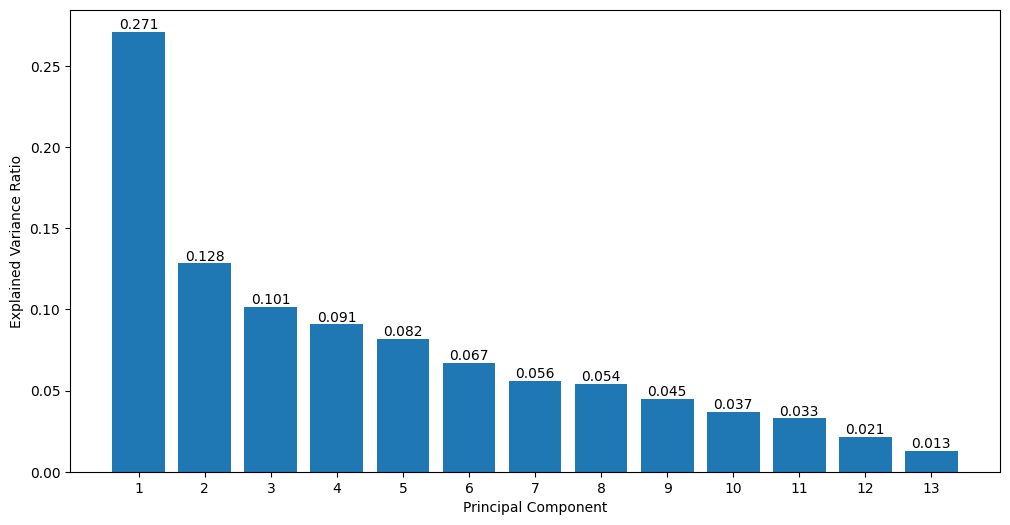

In [172]:
plt.figure(figsize=(12,6))
plt.bar(df_pca_evr['Principal Component'], df_pca_evr['PC EVR'])

# Add value labels on top of each bar
for i, v in enumerate(df_pca_evr['PC EVR']):
    plt.text(i+1, v, f'{v:.3f}', ha='center', va='bottom')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio') 
plt.xticks(df_pca_evr['Principal Component'])
plt.show()

Explained Variance + Cumulative Variance

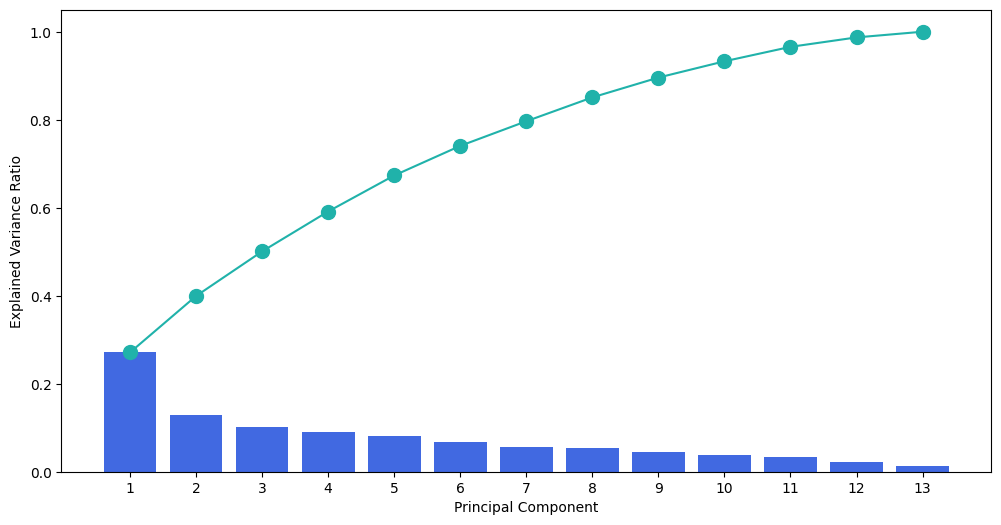

In [173]:
plt.figure(figsize=(12,6))

# Plot bar chart of explained variance
plt.bar(df_pca_evr['Principal Component'], df_pca_evr['PC EVR'], color='royalblue')

# Plot line of cumulative variance
plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PC EVR CumSum'], 
         color='lightseagreen', marker='o', markersize=10)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(df_pca_evr['Principal Component'])
plt.show()

**Observation**

1. Variance Explanation:
    - The first principal component (PC1) explains about 27.1% of the total variance
    - The second PC explains 12.8%
    - Together, the first two components explain approximately 40% of the total variance

2. Cumulative Variance:
    - It takes 3 principal components to explain 50% of the variance (50.07%)
    - To explain 80% of the variance, we need 7 principal components (79.65%)
    - To explain 90% of the variance, we need 9 principal components (89.58%)

3. Elbow Point:
    - There's a noticeable elbow in the scree plot around component 2-3
    - After this point, the explained variance ratio decreases more gradually

4. Data Complexity:
    - Given that we need several components to explain a substantial portion of the variance, this suggests the data has relatively high dimensionality

5. Dimensionality Reduction Considerations:
    - If you're looking for aggressive dimensionality reduction while maintaining reasonable information, we might consider keeping 7 components (80% variance explained)
    - For more conservative analysis, we might want to keep 9 components (90% variance explained)

# Cluster analysis

kmeans model with k value =1, SSE=20930.00
kmeans model with k value =2, SSE=16789.85
kmeans model with k value =3, SSE=15881.42
kmeans model with k value =4, SSE=14473.16
kmeans model with k value =5, SSE=13531.14
kmeans model with k value =6, SSE=13065.95
kmeans model with k value =7, SSE=12759.79
kmeans model with k value =8, SSE=12004.35
kmeans model with k value =9, SSE=11566.50
kmeans model with k value =10, SSE=11393.41


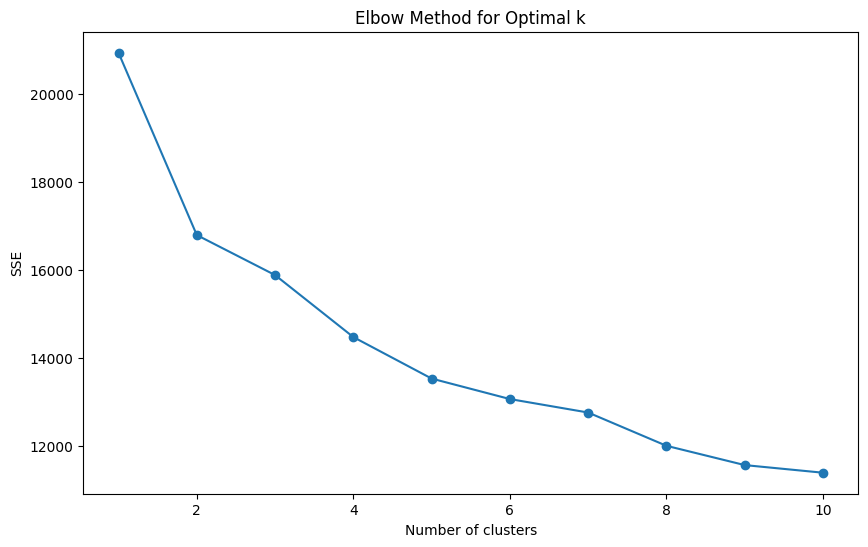

In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
sse, k_val_list = [], range(1,11)
for k_val_list in range(1, 11):
    kmeans = KMeans(n_clusters=k_val_list, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    print(f'kmeans model with k value ={k_val_list}, SSE={kmeans.inertia_:.2f}')

# Plotting the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

k=2, Silhouette Score=0.187
k=3, Silhouette Score=0.127
k=4, Silhouette Score=0.111
k=5, Silhouette Score=0.120
k=6, Silhouette Score=0.110
k=7, Silhouette Score=0.106
k=8, Silhouette Score=0.105
k=9, Silhouette Score=0.120
k=10, Silhouette Score=0.116


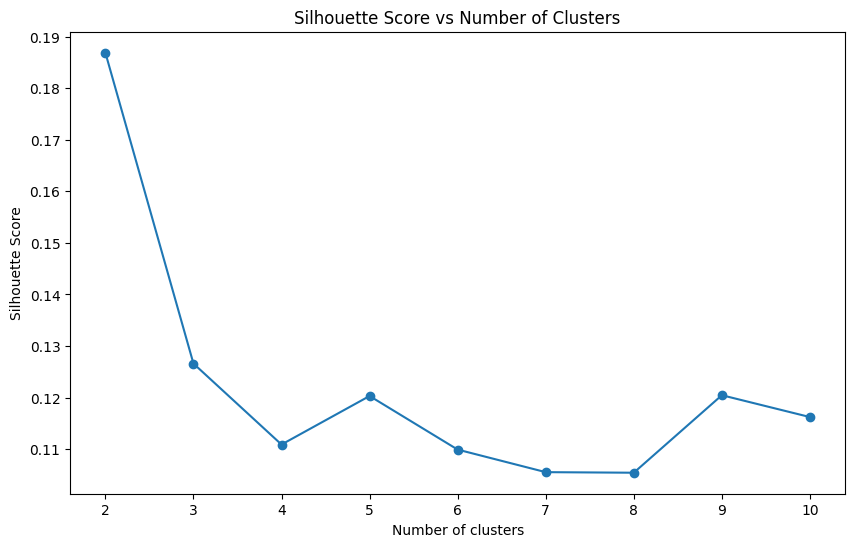

In [175]:
# 1. Calculate silhouette scores to validate your choice of k
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Note: silhouette score needs at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)
    print(f'k={k}, Silhouette Score={score:.3f}')

# Plot silhouette scores
plt.figure(figsize=(10,6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

** Observation**

After running both the Elbow Method and Silhouette Score analysis on my dataset of song features, I've determined that k=2 is the optimal number of clusters. Here's my reasoning:

**Silhouette Score Analysis:**
- My Silhouette Score analysis shows that k=2 is clearly the best choice with a score of approximately 0.187 (18.7%)
- This is significantly higher than all other k values tested, with the next best score dropping to around 0.127 for k=3
- The higher score at k=2 indicates that:
  - The data points are well-matched to their own clusters
  - There's good separation between the two clusters
  - Adding more clusters actually makes the separation less distinct

- Looking at my dataset of song features, which includes metrics like acousticness, danceability, energy, and instrumentalness, a binary classification could represent natural groupings in music, such as:
  - High energy vs. low energy tracks
  - More acoustic vs. more electronic songs
  - Dance-oriented vs. listening-oriented tracks

In [176]:
optimal_k = 2
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = final_kmeans.fit_predict(scaled_features)
cluster_labels.shape

(1610,)

In [177]:
# Add cluster labels to your original dataframe
df_with_cluster = df1.copy()
df_with_cluster['Cluster'] = cluster_labels
df_with_cluster.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10     -1.160941   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10     -1.008460   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10     -0.855979   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10     -0.703497   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10     -0.551016   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT     -0.739355   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU      0.820518   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW      0.728140   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH      1.392383   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw      0.657756   

   danceability    energy  instrumentalness  liveness  loudness  speechiness  \
0     -0.041343  1.115764          3.012099  1.261552 -1.985045     0.784410   
1     -1.007963  0.960062          0.249238  1.344648  0.724545     0.123753   
2     -0.584626  0.982305          0.853953  1.330321  0.680109     0.881280   
3     -0.704571  1.071278         -0.594080  1.155532  0.479980     2.392459   
4     -1.170242  0.982305         -0.392050  1.358975  0.625984     0.455050   

      tempo   valence  popularity  duration_ms  release_year  Cluster  
0 -0.276517 -2.387590    0.982999    -1.930719       1.34862        0  
1  0.183852 -1.142678    1.063495    -0.042138       1.34862        0  
2  0.136323 -1.164306    1.063495     0.050079       1.34862        0  
3  0.236514 -1.882359    0.902504     0.444539       1.34862        0  
4  0.152303 -1.627147    0.902504     0.437392       1.34862        0

In [178]:
# Aggregate by cluster and calculate the mean of numeric features
cluster_summary = df_with_cluster.groupby('Cluster')[numeric_cols].mean()

# Display cluster summary
cluster_summary

track_number  acousticness  danceability    energy  instrumentalness  \
Cluster                                                                         
0            0.302212     -0.253059     -0.647008  0.628365         -0.077935   
1           -0.251958      0.210978      0.539419 -0.523876          0.064975   

         liveness  loudness  speechiness     tempo   valence  popularity  \
Cluster                                                                    
0        0.814306  0.506733     0.508528  0.255509 -0.424068   -0.205964   
1       -0.678898 -0.422470    -0.423966 -0.213021  0.353551    0.171715   

         duration_ms  release_year  
Cluster                             
0           0.341192      0.726010  
1          -0.284456     -0.605284

In [195]:
# Get the most common album for each cluster
most_common_album = df_with_cluster.groupby('Cluster')['album'].agg(lambda x: x.mode()[0])

# Combine numeric summary with the most common album
cluster_summary['most_common_album'] = most_common_album

# Display combined cluster summary
cluster_summary

track_number  acousticness  danceability    energy  instrumentalness  \
Cluster                                                                         
0            0.302212     -0.253059     -0.647008  0.628365         -0.077935   
1           -0.251958      0.210978      0.539419 -0.523876          0.064975   

         liveness  loudness  speechiness     tempo   valence  popularity  \
Cluster                                                                    
0        0.814306  0.506733     0.508528  0.255509 -0.424068   -0.205964   
1       -0.678898 -0.422470    -0.423966 -0.213021  0.353551    0.171715   

         duration_ms  release_year            most_common_album  
Cluster                                                          
0           0.341192      0.726010   Voodoo Lounge Uncut (Live)  
1          -0.284456     -0.605284  Some Girls (Deluxe Version)

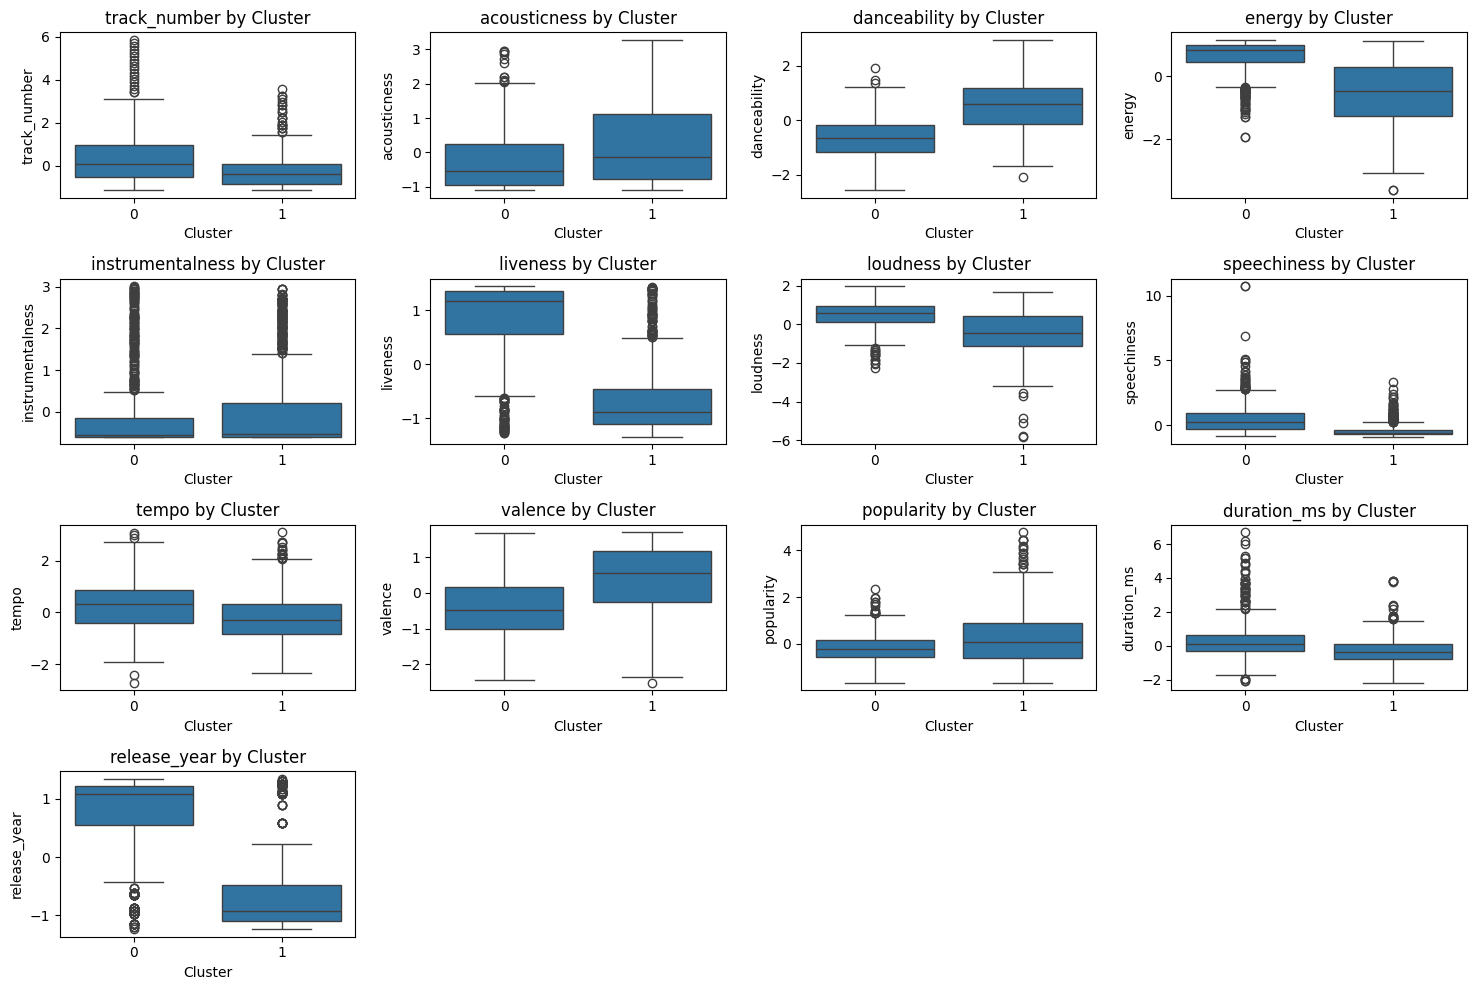

In [204]:
# Key musical features to analyze
features_to_plot = list(df_with_cluster.select_dtypes(include=[np.number]).columns)
features_to_plot.remove('Cluster')  # Remove Cluster column since it's the grouping variable

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(4, 4, i)  # Changed to 4x4 grid to fit 13 numeric features
    sns.boxplot(x='Cluster', y=feature, data=df_with_cluster)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.show()


In [192]:
df_with_cluster.select_dtypes(include=[np.number]).columns

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms', 'release_year', 'Cluster'],
      dtype='object')

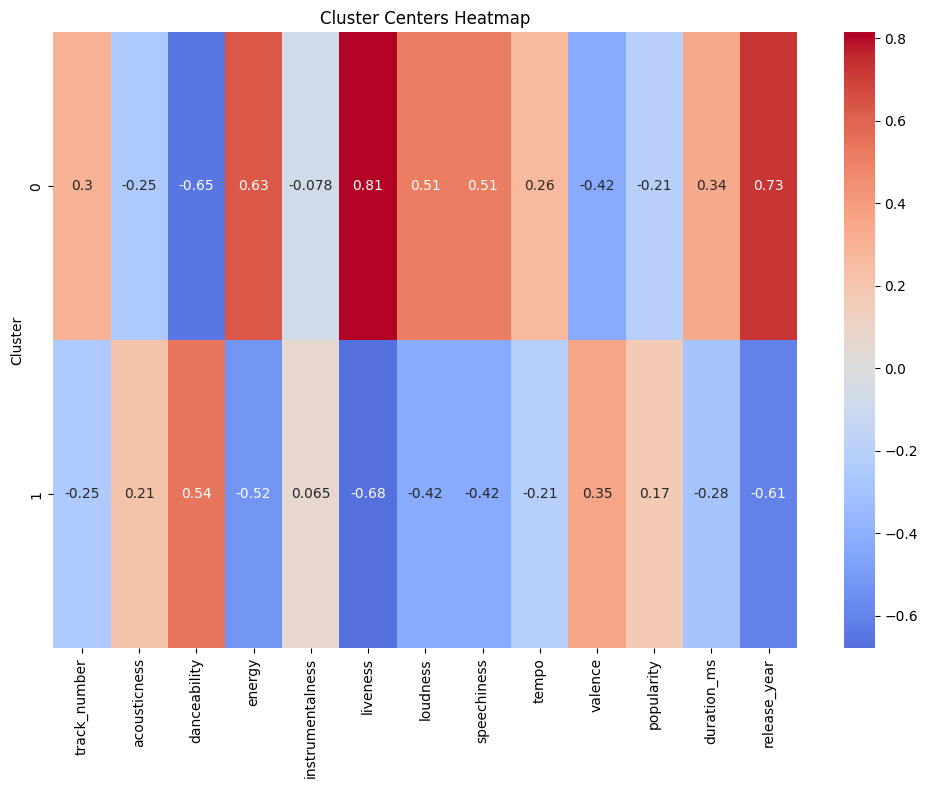

In [206]:
# Calculate means for each cluster
cluster_means = df_with_cluster.groupby('Cluster')[features_to_plot].mean()

# Create heatmap of cluster centers, focusing on musical features
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means[features_to_plot], annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Centers Heatmap')
plt.show()

# Key Insights:

Popular Albums:
   - "Voodoo Lounge Uncut (Live)" and "Some Girls (Deluxe Version)" were identified as albums with the most popular albums among both clusters.

Based on this clustering, we can choose the following cohorts of songs for automatic cohort creation:
   - Cluster 0 (High Energy, Contemporary Cohort):
      - Significantly higher energy (0.63) and liveness (0.81)
      - Higher loudness (0.51) and speechiness (0.51)
      - Notably higher duration_ms (0.34) and release_year (0.73)
      - Lower acousticness (-0.25) and danceability (-0.65)
      - Moderate tempo (0.26)
   - Cluster 1 (Dance-Oriented, Classic Cohort):
      - Higher danceability (0.54)
      - Lower energy (-0.52) and liveness (-0.68)
      - Lower loudness (-0.42) and speechiness (-0.42)
      - Earlier release years (-0.61)
      - Slightly higher acousticness (0.21)

The heatmap visualization provides more precise numerical evidence of the clustering patterns, showing that the primary division is between newer, high-energy, live-feeling tracks versus older, more dance-oriented songs with lower energy levels.